data 에 분석.. 해오기
[1] 타이타닉 시각화
 - 생존자 중 성별 비율 시각화
 - 생존자 나이 별 생존자의 성별 비율 비교 시각화
    하나의 figure에 모두 표시

[2] 시도별 전출입 인구수
 - 1970~2017 이동 인구수
 - 대구에서 타지로 이동 인구수 분석. 시각화
 - 전국 가장 이동이 많이 발생한 지역 / 어느 해에 가장 많이 갔는가. 증감율 폭이 가장 큰 쪽 

In [169]:
# [1] 타이다닉 시각화
# - 생존자 중 성별 비율 시각화
# 생존자 추려내고, 그 중 성별로 나누어서 bar 형태로.


import pandas as pd
import matplotlib.pyplot as plt

file_name = 'titanic.csv'
titanicDF = pd.read_csv(file_name)
titanicDF

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [170]:
# survived & sex DF 형성
# TitaOneDF = titanicDF[['survived','sex']]

# Nan값 확인
# TitaOneDF.isna().sum()

# TitaOneDF.set_index(['survived','sex'])

# titanicDF.set_index(['survived','sex'])

# surmaleDF = titanicDF.loc[(0,'male'),:]

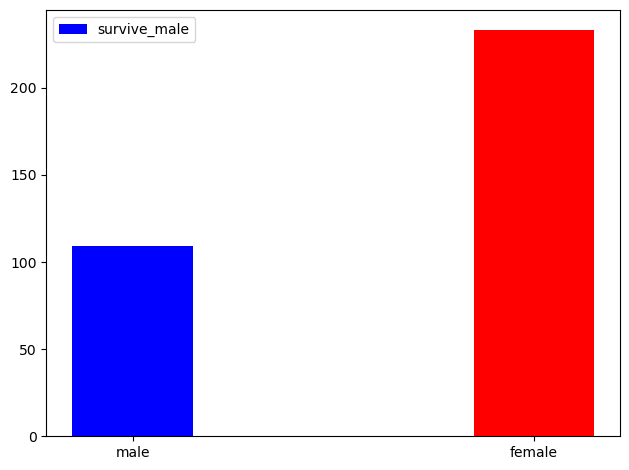

In [171]:


# 그룹화 시도
# ts = TitaOneDF.groupby('survived').count()
# ts

survive_male = titanicDF[(titanicDF.survived==1) & (titanicDF.sex == 'male')]
# survive_male.isna().sum()
one = survive_male['survived'].sum()

survive_female = titanicDF[(titanicDF.survived==1) & (titanicDF.sex == 'female')]
# survive_male.isna().sum()
two = survive_female['survived'].sum()


# plt.matplotlib()

# [3] 데이터 시각화 - 수직 막대 그래프
plt.bar(['male','female'], [one,two], width=0.3, color=['blue','red'])
plt.tight_layout()
plt.legend(['survive_male','survive_female'])
plt.show()

### [2]생존자 나이 별 생존자의 성별 비율 비교 시각화
    * 하나의 figure에 모두 표시

In [172]:
# 확인용 & 전처리
# titanicDF = titanicDF.drop(['pclass','sibsp','parch','adult_male','deck','embark_town','alone'], axis=1)
titanicDF = titanicDF[['survived','sex','age']]

# age 177개 Nan값 
titanicDF.isna().sum() #

survived      0
sex           0
age         177
dtype: int64

In [173]:
# 결측치 제거 / dropna 사용.
titanicDF = titanicDF.dropna()

In [174]:
titanicDF['age'] = pd.cut(titanicDF['age'], bins=[0,9,19,29,39,49,59,69,79,89],labels=['baby','teens','20s','30s','40s','50s','60s','70s','80s'])
titanicDF

,survived,sex,age
0,0,male,20s
1,1,female,30s
2,1,female,20s
3,1,female,30s
4,0,male,30s
...,...,...,...
885,0,female,30s
886,0,male,20s
887,1,female,teens
889,1,male,20s


In [175]:
# 멀티인덱스로 생존여부, 나이대로 묶고 남녀로 가를까
titanicDF = titanicDF.set_index(['survived','age'])
titanicDF.sort_index()
# survDF = titanicDF[titanicDF.index(1)]

sex
survived age         
0        baby    male
         baby    male
         baby  female
         baby    male
         baby    male
...               ...
1        60s   female
         60s     male
         60s     male
         60s   female
         80s     male

[714 rows x 1 columns]

In [191]:

# 70대 생존자가 없어서 계속 키 에러가 뜬다.
baby = list(titanicDF.loc[(1,'baby')].value_counts())
teen = list(titanicDF.loc[(1,'teens')].value_counts())
twen  = list(titanicDF.loc[(1,'20s')].value_counts())
thi = list(titanicDF.loc[(1,'30s')].value_counts())
four = list(titanicDF.loc[(1,'40s')].value_counts())
five = list(titanicDF.loc[(1,'50s')].value_counts())
six = list(titanicDF.loc[(1,'60s')].value_counts())
seven = list(titanicDF.loc[(1,'70s')].value_counts())
# seven = [0,0]
eight  = list(titanicDF.loc[(1,'80s')].value_counts())
age = [baby,teen,twen,thi,four,five,six,seven,eight]

for i in age:
    print(i)


C:\Users\kjy19\AppData\Local\Temp\ipykernel_16484\1433503423.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  baby = list(titanicDF.loc[(1,'baby')].value_counts())
C:\Users\kjy19\AppData\Local\Temp\ipykernel_16484\1433503423.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  teen = list(titanicDF.loc[(1,'teens')].value_counts())
C:\Users\kjy19\AppData\Local\Temp\ipykernel_16484\1433503423.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  twen  = list(titanicDF.loc[(1,'20s')].value_counts())
C:\Users\kjy19\AppData\Local\Temp\ipykernel_16484\1433503423.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  thi = list(titanicDF.loc[(1,'30s')].value_counts())
C:\Users\kjy19\AppData\Local\Temp\ipykernel_16484\1433503423.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  four = list(titanicDF.loc[(1,'40s')].value_counts())
C:\Users\kjy19\AppData\Loca

KeyError: '70s'

In [188]:
baby = list(titanicDF.loc[(1,'baby')].value_counts())
baby

C:\Users\kjy19\AppData\Local\Temp\ipykernel_16484\3951567706.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  baby = list(titanicDF.loc[(1,'baby')].value_counts())


[19, 19]

[<Axes: > <Axes: > <Axes: >]
[<Axes: > <Axes: > <Axes: >]
[<Axes: > <Axes: > <Axes: >]


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

c:\Users\kjy19\anaconda3\envs\EV_PY39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\kjy19\anaconda3\envs\EV_PY39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\kjy19\anaconda3\envs\EV_PY39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\kjy19\anaconda3\envs\EV_PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kjy19\anaconda3\envs\EV_PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

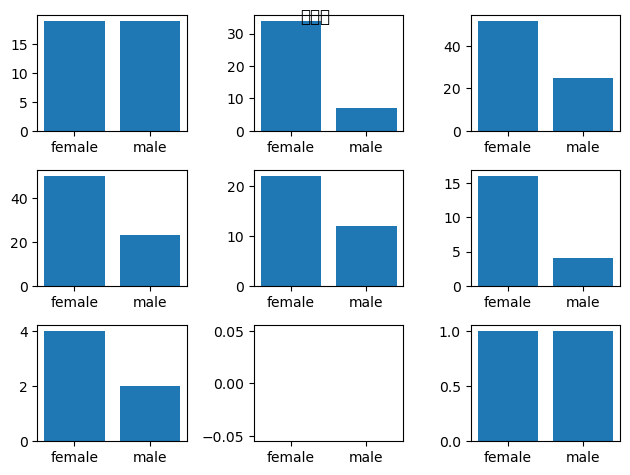

In [186]:
# baby[]
# plt.bar( ['male','female'], baby)

import numpy as np
fig = plt.figure()
axes = fig.subplots(3,3)
# fmfs = ['bo-','go-','ro-','ko--']
# datas = titanicDF.index.to_list()[:4]

# for idx, ax in enumerate(axes):
#     print(idx, ax)
"""
    0 [<Axes: > <Axes: > <Axes: >]
1 [<Axes: > <Axes: > <Axes: >]
2 [<Axes: > <Axes: > <Axes: >]
    """

for ax in axes:
    print(ax)
"""
    0 [<Axes: > <Axes: > <Axes: >]
1 [<Axes: > <Axes: > <Axes: >]
2 [<Axes: > <Axes: > <Axes: >]
# """
# i = 0
# for i in range(3):
#     for ax in axes:
#         ax = plt.bar(['male','female'], age[i]) # label = f'{age}'
#         fig.suptitle('생존자')
#         i += 1


s = 0
for i in range(0,3):
    for j in range(0,3):
        axes[i][j].bar(['female','male'], age[s], label = f'{age}') # 

        s += 1
# plt.legend()
fig.tight_layout()
fig.suptitle('생존자')
axes

### 시도별